# Evaluation

Generate eveluation plots based on generated experiments.

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os

Define color pallet.

In [142]:
colors = ["#b4c9f7", "#f4b5b5", "#c6eca8", "#f4ca8c", "#b6a5de", "#9bf3e3"]

## Retrieval Evaluation

### Retrieval Evaluation

Experiment V1-V3 are all using R1: no metadata and 300 indexed documents. Opposedly, V4-V6 use the same setting R2: metadata extraction fields (summary and keywords).  V7-V9 use chunk size of 256 and metadata.

We use the retrieval results from experiment 1, 4 and 7 to view the differences.

In [246]:
## READ V1 AND V4

data = []

# Define the versions to compare
versions_to_compare = [1, 4, 7]

# Iterate over the selected versions
for version in versions_to_compare:
    csv_file = f'../experiments/v{version}/summary_statistics.csv'
    try:
        df = pd.read_csv(csv_file)  # Adjust delimiter if necessary
        experiment_name = f'v{version}'  # Use version as experiment name
        data.append({
            'Experiment': experiment_name,
            'avg_hit_rate': df['avg_hit_rate'].iloc[0],
            'avg_mrr': df['avg_mrr'].iloc[0],
            'avg_recall': df['avg_recall'].iloc[0]
        })
    except FileNotFoundError:
        print(f"File {csv_file} not found.")
    except pd.errors.EmptyDataError:
        print(f"File {csv_file} is empty.")
    except Exception as e:
        print(f"An error occurred while processing {csv_file}: {e}")

# Convert list of dictionaries to DataFrame
data_df = pd.DataFrame(data)

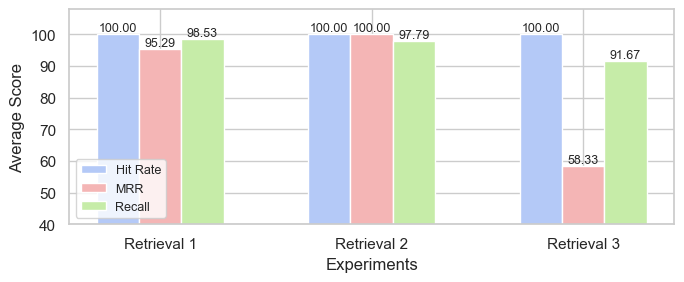

In [251]:
# Plotting
fig, ax = plt.subplots(figsize=(7, 3))

# Define the bar width and positions
bar_width = 0.2
positions = range(len(data_df))

# Plot each metric
bars1 = ax.bar([p - bar_width for p in positions], data_df['avg_hit_rate'], width=bar_width, label='avg_hit_rate', color=colors[0])
bars2 = ax.bar(positions, data_df['avg_mrr'], width=bar_width, label='avg_mrr', color=colors[1])
bars3 = ax.bar([p + bar_width for p in positions], data_df['avg_recall'], width=bar_width, label='avg_recall', color=colors[2])

# Add labels and title
ax.set_xlabel('Experiments')
ax.set_ylabel('Average Score')
# ax.set_title('Comparison of avg_hit_rate, avg_mrr, avg_recall Across Experiments')
ax.set_xticks(positions)
ax.set_xticklabels(["Retrieval 1", "Retrieval 2", "Retrieval 3"])
ax.legend(loc="lower left", fontsize=9, labels=["Hit Rate", "MRR", "Recall"])

# Add value annotations on top of each bar
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=9)

# Show the plot
plt.tight_layout()
plt.ylim(40, 108)
plt.show()

### Generation Evaluation

Verify the impact of retrieval settings over the generation metrics.

In [369]:
## READ V1-V6

data = []

# Define the versions to compare
versions_to_compare = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Iterate over the selected versions
for version in versions_to_compare:
    csv_file = f'../experiments/v{version}/summary_statistics.csv'
    try:
        df = pd.read_csv(csv_file)  # Adjust delimiter if necessary
        experiment_name = f'v{version}'  # Use version as experiment name
        data.append({
            'Experiment': experiment_name,
            'Retrieval_Setting': 'Retrieval 1' if (version < 4) else  ('Retrieval 2' if (version < 7) else 'Retrieval 3'),
            'Chat_Setting': 'condense_context' if (version == 1) or (version == 4) or (version == 7) else ('condense' if (version == 2) or (version == 5) or (version == 8) else 'react'),
            'relevancy_passing_rate': df['relevancy_passing_rate'].iloc[0],
            'faithfulness_passing_rate': df['faithfulness_passing_rate'].iloc[0],
            'correctness_passing_rate': df['correctness_passing_rate'].iloc[0],
            'semantic_similarity_passing_rate': df['semantic_similarity_passing_rate'].iloc[0],
            'avg_query_time': df['avg_query_time'].iloc[0]
        })
    except FileNotFoundError:
        print(f"File {csv_file} not found.")
    except pd.errors.EmptyDataError:
        print(f"File {csv_file} is empty.")
    except Exception as e:
        print(f"An error occurred while processing {csv_file}: {e}")

# Convert list of dictionaries to DataFrame
data_df = pd.DataFrame(data)

In [370]:
data_df

,Experiment,Retrieval_Setting,Chat_Setting,relevancy_passing_rate,faithfulness_passing_rate,correctness_passing_rate,semantic_similarity_passing_rate,avg_query_time
0,v1,Retrieval 1,condense_context,68.852459,67.213115,86.885246,98.360656,2.491551
1,v2,Retrieval 1,condense,67.213115,72.131148,77.049180,98.360656,2.326954
2,v3,Retrieval 1,react,65.573770,67.213115,78.688525,98.360656,3.946533
3,v4,Retrieval 2,condense_context,73.770492,67.213115,85.245902,98.360656,2.597913
4,v5,Retrieval 2,condense,78.688525,75.409836,80.327869,98.360656,2.344331
5,v6,Retrieval 2,react,75.409836,80.327869,75.409836,98.360656,3.765271
6,v7,Retrieval 3,condense_context,75.409836,70.491803,85.245902,98.360656,2.347429
7,v8,Retrieval 3,condense,77.049180,88.524590,78.688525,98.360656,2.112882
8,v9,Retrieval 3,react,75.409836,81.967213,80.327869,98.360656,3.408908


/var/folders/k2/v8kl186j6j7gg9g7z2ndptxw0000gn/T/ipykernel_88628/1862613935.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=15)
/var/folders/k2/v8kl186j6j7gg9g7z2ndptxw0000gn/T/ipykernel_88628/1862613935.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=15)
/var/folders/k2/v8kl186j6j7gg9g7z2ndptxw0000gn/T/ipykernel_88628/1862613935.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=15)
/var/folders/k2/v8kl186j6j7gg9g7z2ndptxw0000gn/T/ipykernel_88628/1862613935.py:60: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0.02, 

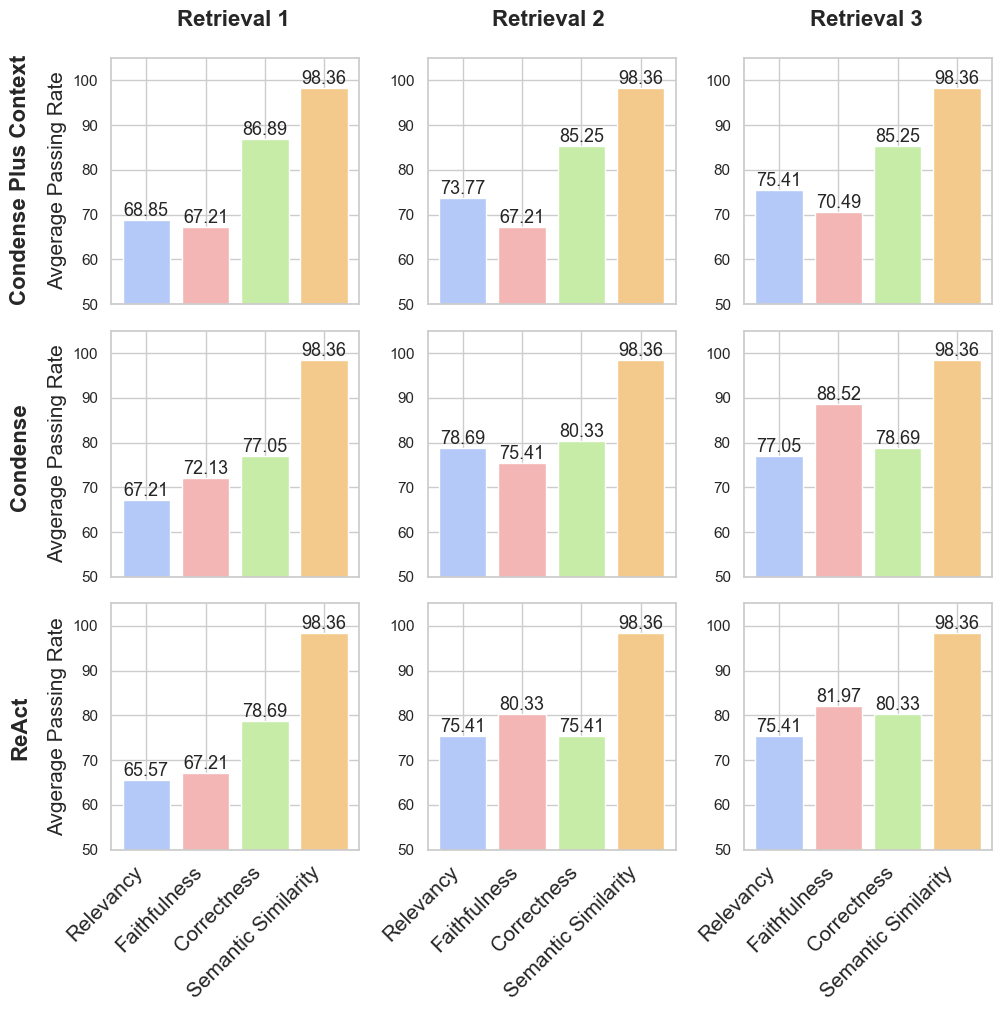

In [375]:
# Create a figure with 2 rows and 3 columns of subplots
fig, axs = plt.subplots(3, 3, figsize=(10, 10), constrained_layout=True)

# Define the metrics to plot
metrics = ['relevancy_passing_rate', 'faithfulness_passing_rate', 'correctness_passing_rate', 'semantic_similarity_passing_rate']
labels = ['Relevancy', 'Faithfulness', 'Correctness', 'Semantic Similarity']
chat_modes = ['Condense Context', 'Condense', 'ReAct']

# Iterate over each subplot and plot the corresponding data
for i, chat_setting in enumerate(['condense_context', 'condense', 'react']):
    for j, retrieval_setting in enumerate(['Retrieval 1', 'Retrieval 2', 'Retrieval 3']):
        ax = axs[i, j]
        
        # Filter data for the current subplot
        subset = data_df[(data_df['Retrieval_Setting'] == retrieval_setting) & (data_df['Chat_Setting'] == chat_setting)]

        # Plot the metrics
        bars = ax.bar(metrics, subset.iloc[0, 3:7], color=colors)
        
        # Add value annotations on top of each bar
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=13)
        
        # Set subplot title
        # ax.set_title(f'{retrieval_setting} - {chat_modes[j]}')
        
        # Set y-axis label only for the first column
        if j == 0:
            ax.set_ylabel('Avgerage Passing Rate', fontsize=15)
        
        if i == 0 or i == 1:
            ax.set_xticklabels([])
        else:
            # Rotate x-axis labels for better readability
            ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=15)
        ax.set_ylim(50, 105)

# Add titles for each row
fig.text(0.01, 0.84, 'Condense Plus Context', ha='center', va='center', fontsize=16, fontweight='bold', rotation=90)
fig.text(0.01, 0.563, 'Condense', ha='center', va='center', fontsize=16, fontweight='bold', rotation=90)
fig.text(0.01, 0.292, 'ReAct', ha='center', va='center', fontsize=16, fontweight='bold', rotation=90)

# Add titles for each column
fig.text(0.223, 1, 'Retrieval 1', ha='center', va='center', fontsize=16, fontweight='bold')
fig.text(0.538, 1, 'Retrieval 2', ha='center', va='center', fontsize=16, fontweight='bold')
fig.text(0.856, 1, 'Retrieval 3', ha='center', va='center', fontsize=16, fontweight='bold')

# Adjust the layout to make room for the titles
plt.tight_layout(rect=[0.02, 0, 1, 0.98])

# Show the plot
# plt.tight_layout()
plt.show()

Shift axis for better interpretability and model analysis.

/var/folders/k2/v8kl186j6j7gg9g7z2ndptxw0000gn/T/ipykernel_88628/191729158.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=15)
/var/folders/k2/v8kl186j6j7gg9g7z2ndptxw0000gn/T/ipykernel_88628/191729158.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=15)
/var/folders/k2/v8kl186j6j7gg9g7z2ndptxw0000gn/T/ipykernel_88628/191729158.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=15)
/var/folders/k2/v8kl186j6j7gg9g7z2ndptxw0000gn/T/ipykernel_88628/191729158.py:50: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0.02, 0, 1

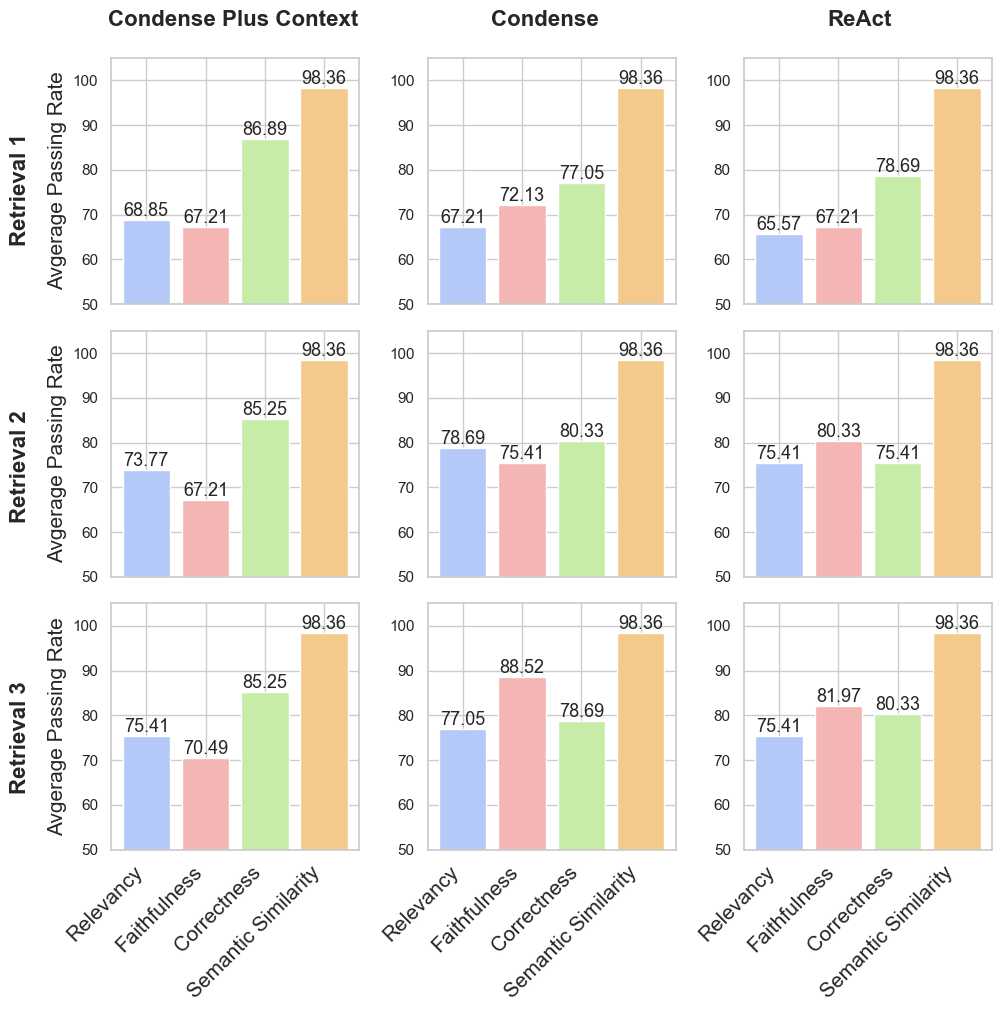

In [364]:
# Create a figure with 2 rows and 3 columns of subplots
fig, axs = plt.subplots(3, 3, figsize=(10, 10), constrained_layout=True)

# Define the metrics to plot
metrics = ['relevancy_passing_rate', 'faithfulness_passing_rate', 'correctness_passing_rate', 'semantic_similarity_passing_rate']
labels = ['Relevancy', 'Faithfulness', 'Correctness', 'Semantic Similarity']
chat_modes = ['Condense Context', 'Condense', 'ReAct']

# Iterate over each subplot and plot the corresponding data
for i, retrieval_setting in enumerate(['Retrieval 1', 'Retrieval 2', 'Retrieval 3']):
    for j, chat_setting in enumerate(['condense_context', 'condense', 'react']):
        ax = axs[i, j]
        
        # Filter data for the current subplot
        subset = data_df[(data_df['Retrieval_Setting'] == retrieval_setting) & (data_df['Chat_Setting'] == chat_setting)]

        # Plot the metrics
        bars = ax.bar(metrics, subset.iloc[0, 3:7], color=colors)
        
        # Add value annotations on top of each bar
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=13)
        
        # Set subplot title
        # ax.set_title(f'{retrieval_setting} - {chat_modes[j]}')
        
        # Set y-axis label only for the first column
        if j == 0:
            ax.set_ylabel('Avgerage Passing Rate', fontsize=15)
        
        if i == 0 or i == 1:
            ax.set_xticklabels([])
        else:
            # Rotate x-axis labels for better readability
            ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=15)
        ax.set_ylim(50, 105)

# Add titles for each row
fig.text(0.01, 0.83, 'Retrieval 1', ha='center', va='center', fontsize=16, fontweight='bold', rotation=90)
fig.text(0.01, 0.553, 'Retrieval 2', ha='center', va='center', fontsize=16, fontweight='bold', rotation=90)
fig.text(0.01, 0.282, 'Retrieval 3', ha='center', va='center', fontsize=16, fontweight='bold', rotation=90)

# Add titles for each column
fig.text(0.223, 1, 'Condense Plus Context', ha='center', va='center', fontsize=16, fontweight='bold')
fig.text(0.535, 1, 'Condense', ha='center', va='center', fontsize=16, fontweight='bold')
fig.text(0.85, 1, 'ReAct', ha='center', va='center', fontsize=16, fontweight='bold')

# Adjust the layout to make room for the titles
plt.tight_layout(rect=[0.02, 0, 1, 0.98])

# Show the plot
# plt.tight_layout()
plt.show()

Review additional statistical metrics.

In [274]:
## READ V1-V6

data = []

# Define the versions to compare
versions_to_compare = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Iterate over the selected versions
for version in versions_to_compare:
    csv_file = f'../experiments/v{version}/summary_statistics.csv'
    try:
        df = pd.read_csv(csv_file)  # Adjust delimiter if necessary
        experiment_name = f'v{version}'  # Use version as experiment name
        data.append({
            'Experiment': experiment_name,
            'Retrieval_Setting': 'Retrieval 1' if (version < 4) else  ('Retrieval 2' if (version < 7) else 'Retrieval 3'),
            'Chat_Setting': 'condense_context' if (version == 1) or (version == 4) or (version == 7) else ('condense' if (version == 2) or (version == 5) or (version == 8) else 'react'),
            
            'faithfulness_score_variance': df['faithfulness_score_variance'].iloc[0],
            'faithfulness_score_p90': df['faithfulness_score_p90'].iloc[0],
            
            'correctness_score_variance': df['correctness_score_variance'].iloc[0] / 5,  # Normalize
            'correctness_score_p90': df['correctness_score_p90'].iloc[0] / 5,  # Normalize

            'semantic_similarity_score_variance': df['semantic_similarity_score_variance'].iloc[0],
            'semantic_similarity_score_p90': df['semantic_similarity_score_p90'].iloc[0],
        })
    except FileNotFoundError:
        print(f"File {csv_file} not found.")
    except pd.errors.EmptyDataError:
        print(f"File {csv_file} is empty.")
    except Exception as e:
        print(f"An error occurred while processing {csv_file}: {e}")

# Convert list of dictionaries to DataFrame
data_df = pd.DataFrame(data)
data_df

,Experiment,Retrieval_Setting,Chat_Setting,faithfulness_score_variance,faithfulness_score_p90,correctness_score_variance,correctness_score_p90,semantic_similarity_score_variance,semantic_similarity_score_p90
0,v1,Retrieval 1,condense_context,0.220371,1.0,0.038726,0.9,0.001606,0.989617
1,v2,Retrieval 1,condense,0.201021,1.0,0.079629,1.0,0.001831,0.994068
2,v3,Retrieval 1,react,0.220371,1.0,0.100215,1.0,0.002235,0.999134
3,v4,Retrieval 2,condense_context,0.220371,1.0,0.071486,1.0,0.001670,0.984522
4,v5,Retrieval 2,condense,0.185434,1.0,0.078044,1.0,0.001898,0.995046
5,v6,Retrieval 2,react,0.158022,1.0,0.107202,1.0,0.002291,0.999304
6,v7,Retrieval 3,condense_context,0.208009,1.0,0.055093,0.9,0.001683,0.986658
7,v8,Retrieval 3,condense,0.101586,1.0,0.104730,1.0,0.002220,0.994951
8,v9,Retrieval 3,react,0.147810,1.0,0.110105,1.0,0.002371,0.999999


## Generation Evaluation

Evaluate further experiments over changes implemented in the inference process. 

In [376]:
## READ V1-V6

data = []

# Define the versions to compare
versions_to_compare = [4, 5, 6, 10, 11, 12, 13, 14, 15, 16, 17, 18]

# Iterate over the selected versions
for version in versions_to_compare:
    csv_file = f'../experiments/v{version}/summary_statistics.csv'
    try:
        df = pd.read_csv(csv_file)  # Adjust delimiter if necessary
        experiment_name = f'v{version}'  # Use version as experiment name
        data.append({
            'Experiment': experiment_name,
            'Retrieval_Setting': 'Retrieval 2',
            'Generation_Setting': 'COMPACT + Context Reorder' if version < 8 else ('REFINE + Context Reorder' if 8 < version < 13 else ( 'COMPACT' if 12 < version < 16 else 'COMPACT + 0.85')),
            'Chat_Setting': 'condense_context' if (version == 4) or (version == 10) or (version == 13) or (version == 16) else ('condense' if (version == 5) or (version == 11) or (version == 14) or (version == 17) else 'react'),
            'relevancy_passing_rate': df['relevancy_passing_rate'].iloc[0],
            'faithfulness_passing_rate': df['faithfulness_passing_rate'].iloc[0],
            'correctness_passing_rate': df['correctness_passing_rate'].iloc[0],
            'semantic_similarity_passing_rate': df['semantic_similarity_passing_rate'].iloc[0],
            'avg_query_time': df['avg_query_time'].iloc[0]
        })
    except FileNotFoundError:
        print(f"File {csv_file} not found.")
    except pd.errors.EmptyDataError:
        print(f"File {csv_file} is empty.")
    except Exception as e:
        print(f"An error occurred while processing {csv_file}: {e}")

# Convert list of dictionaries to DataFrame
data_df = pd.DataFrame(data)

In [377]:
data_df

,Experiment,Retrieval_Setting,Generation_Setting,Chat_Setting,relevancy_passing_rate,faithfulness_passing_rate,correctness_passing_rate,semantic_similarity_passing_rate,avg_query_time
0,v4,Retrieval 2,COMPACT + Context Reorder,condense_context,73.770492,67.213115,85.245902,98.360656,2.597913
1,v5,Retrieval 2,COMPACT + Context Reorder,condense,78.688525,75.409836,80.327869,98.360656,2.344331
2,v6,Retrieval 2,COMPACT + Context Reorder,react,75.409836,80.327869,75.409836,98.360656,3.765271
3,v10,Retrieval 2,REFINE + Context Reorder,condense_context,80.327869,62.295082,86.885246,98.360656,2.760705
4,v11,Retrieval 2,REFINE + Context Reorder,condense,68.852459,68.852459,65.573770,91.803279,6.629656
5,v12,Retrieval 2,REFINE + Context Reorder,react,63.934426,75.409836,63.934426,93.442623,7.976062
6,v13,Retrieval 2,COMPACT,condense_context,80.327869,68.852459,83.606557,98.360656,3.187841
7,v14,Retrieval 2,COMPACT,condense,65.573770,60.655738,80.327869,96.721311,2.228963
8,v15,Retrieval 2,COMPACT,react,67.213115,70.491803,77.049180,98.360656,3.763590
9,v16,Retrieval 2,COMPACT + 0.85,condense_context,75.409836,63.934426,80.327869,98.360656,6.682006


/var/folders/k2/v8kl186j6j7gg9g7z2ndptxw0000gn/T/ipykernel_88628/2346029439.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=15)
/var/folders/k2/v8kl186j6j7gg9g7z2ndptxw0000gn/T/ipykernel_88628/2346029439.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=15)
/var/folders/k2/v8kl186j6j7gg9g7z2ndptxw0000gn/T/ipykernel_88628/2346029439.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=15)
/var/folders/k2/v8kl186j6j7gg9g7z2ndptxw0000gn/T/ipykernel_88628/2346029439.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e

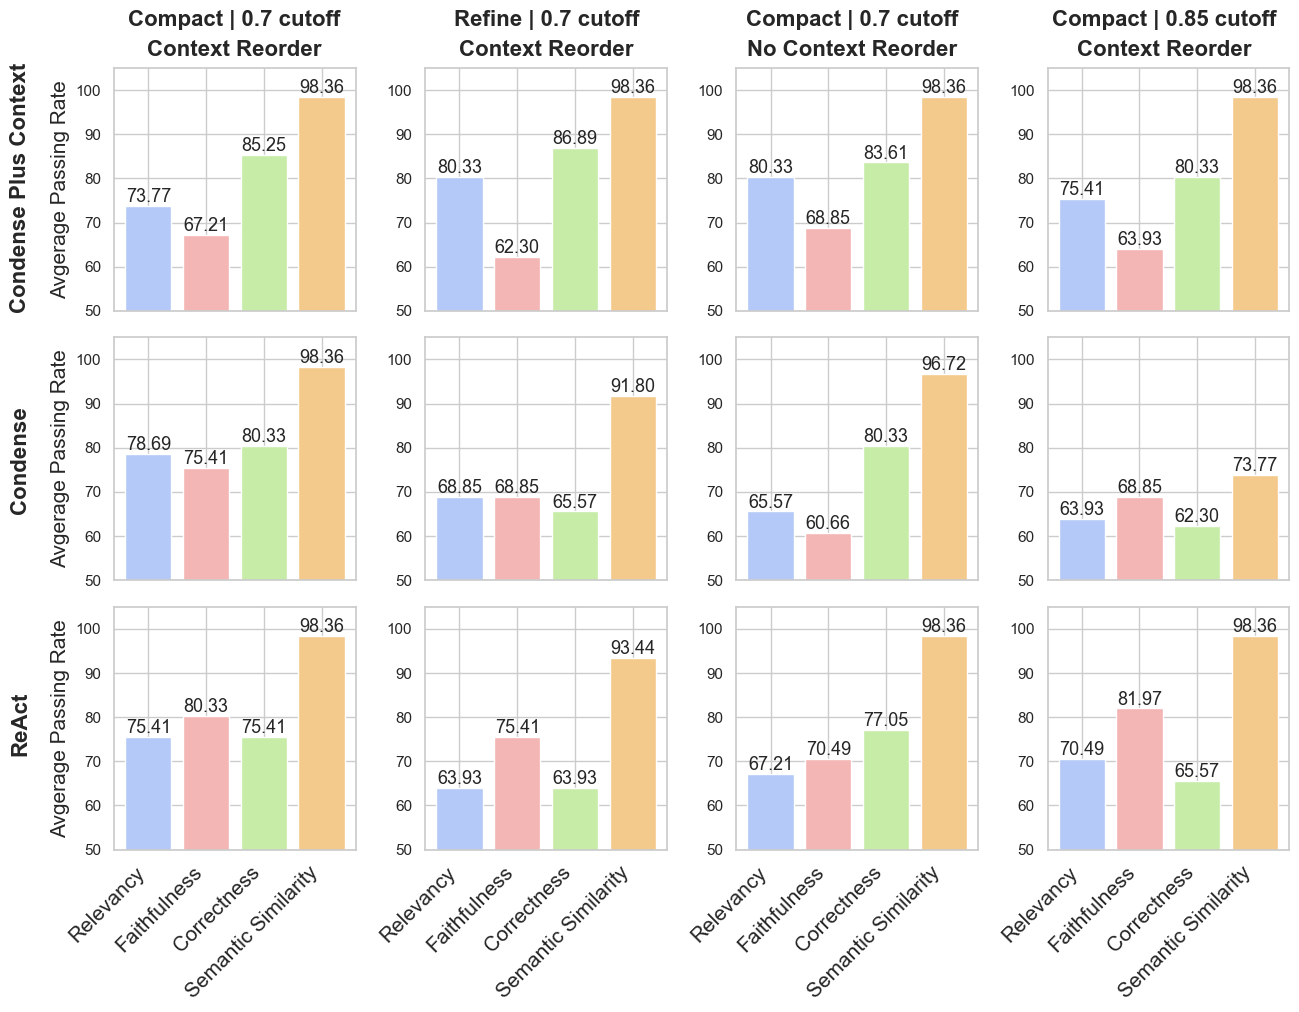

In [410]:
# Create a figure with 2 rows and 3 columns of subplots
fig, axs = plt.subplots(3, 4, figsize=(13, 10), constrained_layout=True)

# Define the metrics to plot
metrics = ['relevancy_passing_rate', 'faithfulness_passing_rate', 'correctness_passing_rate', 'semantic_similarity_passing_rate']
labels = ['Relevancy', 'Faithfulness', 'Correctness', 'Semantic Similarity']
chat_modes = ['Condense Context', 'Condense', 'ReAct']

# Iterate over each subplot and plot the corresponding data
for i, chat_setting in enumerate(['condense_context', 'condense', 'react']):
    for j, generation_setting in enumerate(['COMPACT + Context Reorder', 'REFINE + Context Reorder', 'COMPACT', 'COMPACT + 0.85']):
        ax = axs[i, j]
        
        # Filter data for the current subplot
        subset = data_df[(data_df['Generation_Setting'] == generation_setting) & (data_df['Chat_Setting'] == chat_setting)]

        # Plot the metrics
        bars = ax.bar(metrics, subset.iloc[0, 4:8], color=colors)
        
        # Add value annotations on top of each bar
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=13)
        
        # Set subplot title
        # ax.set_title(f'{retrieval_setting} - {chat_modes[j]}')
        
        # Set y-axis label only for the first column
        if j == 0:
            ax.set_ylabel('Avgerage Passing Rate', fontsize=15)
        
        if i == 0 or i == 1:
            ax.set_xticklabels([])
        else:
            # Rotate x-axis labels for better readability
            ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=15)
        ax.set_ylim(50, 105)

# Add titles for each row
fig.text(0.01, 0.832, 'Condense Plus Context', ha='center', va='center', fontsize=16, fontweight='bold', rotation=90)

fig.text(0.01, 0.56, 'Condense', ha='center', va='center', fontsize=16, fontweight='bold', rotation=90)

fig.text(0.01, 0.296, 'ReAct', ha='center', va='center', fontsize=16, fontweight='bold', rotation=90)

# Add titles for each column
fig.text(0.175, 1, 'Compact | 0.7 cutoff', ha='center', va='center', fontsize=16, fontweight='bold')
fig.text(0.175, 0.97, 'Context Reorder', ha='center', va='center', fontsize=16, fontweight='bold')

fig.text(0.415, 1, 'Refine | 0.7 cutoff', ha='center', va='center', fontsize=16, fontweight='bold')
fig.text(0.415, 0.97, 'Context Reorder', ha='center', va='center', fontsize=16, fontweight='bold')

fig.text(0.65, 1, 'Compact | 0.7 cutoff', ha='center', va='center', fontsize=16, fontweight='bold')
fig.text(0.65, 0.97, 'No Context Reorder', ha='center', va='center', fontsize=16, fontweight='bold')

fig.text(0.89, 1, 'Compact | 0.85 cutoff', ha='center', va='center', fontsize=16, fontweight='bold')
fig.text(0.89, 0.97, 'Context Reorder', ha='center', va='center', fontsize=16, fontweight='bold')


# Adjust the layout to make room for the titles
plt.tight_layout(rect=[0.02, 0, 1, 0.97])

# Show the plot
# plt.tight_layout()
plt.show()

Shift axis for better model interpretability and analysis.

/var/folders/k2/v8kl186j6j7gg9g7z2ndptxw0000gn/T/ipykernel_88628/1436077105.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=15)
/var/folders/k2/v8kl186j6j7gg9g7z2ndptxw0000gn/T/ipykernel_88628/1436077105.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=15)
/var/folders/k2/v8kl186j6j7gg9g7z2ndptxw0000gn/T/ipykernel_88628/1436077105.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=15)
/var/folders/k2/v8kl186j6j7gg9g7z2ndptxw0000gn/T/ipykernel_88628/1436077105.py:58: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0.06, 

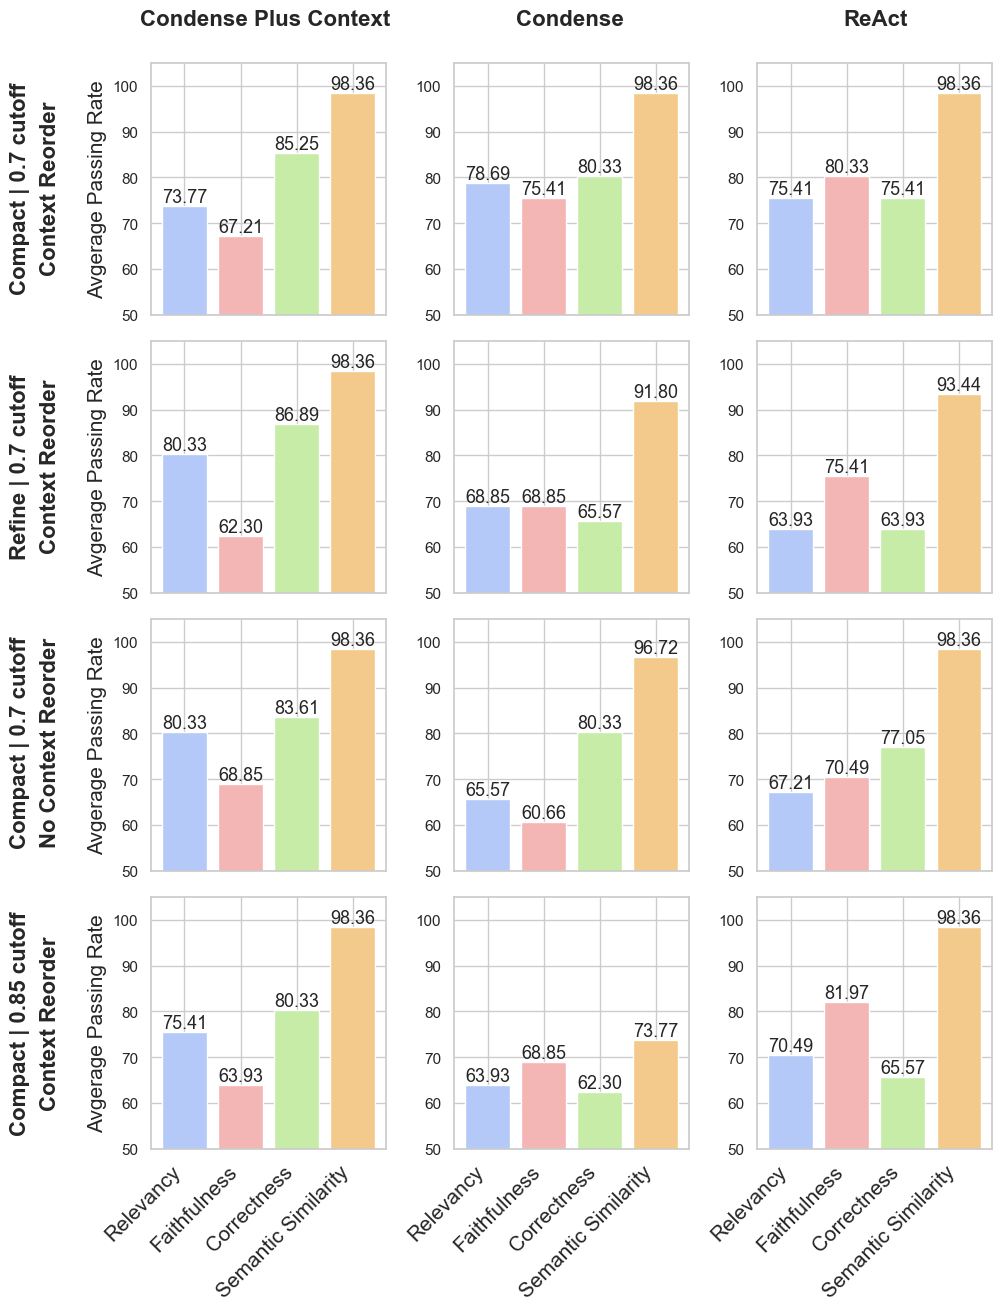

In [368]:
# Create a figure with 2 rows and 3 columns of subplots
fig, axs = plt.subplots(4, 3, figsize=(10, 13), constrained_layout=True)

# Define the metrics to plot
metrics = ['relevancy_passing_rate', 'faithfulness_passing_rate', 'correctness_passing_rate', 'semantic_similarity_passing_rate']
labels = ['Relevancy', 'Faithfulness', 'Correctness', 'Semantic Similarity']
chat_modes = ['Condense Context', 'Condense', 'ReAct']

# Iterate over each subplot and plot the corresponding data
for i, generation_setting in enumerate(['COMPACT + Context Reorder', 'REFINE + Context Reorder', 'COMPACT', 'COMPACT + 0.85']):
    for j, chat_setting in enumerate(['condense_context', 'condense', 'react']):
        ax = axs[i, j]
        
        # Filter data for the current subplot
        subset = data_df[(data_df['Generation_Setting'] == generation_setting) & (data_df['Chat_Setting'] == chat_setting)]

        # Plot the metrics
        bars = ax.bar(metrics, subset.iloc[0, 4:8], color=colors)
        
        # Add value annotations on top of each bar
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=13)
        
        # Set subplot title
        # ax.set_title(f'{retrieval_setting} - {chat_modes[j]}')
        
        # Set y-axis label only for the first column
        if j == 0:
            ax.set_ylabel('Avgerage Passing Rate', fontsize=15)
        
        if i == 0 or i == 1 or i == 2:
            ax.set_xticklabels([])
        else:
            # Rotate x-axis labels for better readability
            ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=15)
        ax.set_ylim(50, 105)

# Add titles for each row
fig.text(0.01, 0.87, 'Compact | 0.7 cutoff', ha='center', va='center', fontsize=16, fontweight='bold', rotation=90)
fig.text(0.04, 0.87, 'Context Reorder', ha='center', va='center', fontsize=16, fontweight='bold', rotation=90)

fig.text(0.01, 0.656, 'Refine | 0.7 cutoff', ha='center', va='center', fontsize=16, fontweight='bold', rotation=90)
fig.text(0.04, 0.656, 'Context Reorder', ha='center', va='center', fontsize=16, fontweight='bold', rotation=90)

fig.text(0.01, 0.444, 'Compact | 0.7 cutoff', ha='center', va='center', fontsize=16, fontweight='bold', rotation=90)
fig.text(0.04, 0.444, 'No Context Reorder', ha='center', va='center', fontsize=16, fontweight='bold', rotation=90)

fig.text(0.01, 0.228, 'Compact | 0.85 cutoff', ha='center', va='center', fontsize=16, fontweight='bold', rotation=90)
fig.text(0.04, 0.228, 'Context Reorder', ha='center', va='center', fontsize=16, fontweight='bold', rotation=90)

# Add titles for each column
fig.text(0.255, 1, 'Condense Plus Context', ha='center', va='center', fontsize=16, fontweight='bold')
fig.text(0.56, 1, 'Condense', ha='center', va='center', fontsize=16, fontweight='bold')
fig.text(0.865, 1, 'ReAct', ha='center', va='center', fontsize=16, fontweight='bold')

# Adjust the layout to make room for the titles
plt.tight_layout(rect=[0.06, 0, 1, 0.98])

# Show the plot
# plt.tight_layout()
plt.show()

Show additional statistical metrics (p90 and variance).

In [335]:
data = []

# Define the versions to compare
versions_to_compare = [4, 5, 6, 10, 11, 12, 13, 14, 15, 16, 17, 18]

# Iterate over the selected versions
for version in versions_to_compare:
    csv_file = f'../experiments/v{version}/summary_statistics.csv'
    try:
        df = pd.read_csv(csv_file)  # Adjust delimiter if necessary
        experiment_name = f'v{version}'  # Use version as experiment name
        data.append({
            'Experiment': experiment_name,
            'Retrieval_Setting': 'Retrieval 2',
            'Generation_Setting': 'COMPACT + Context Reorder' if version < 8 else ('REFINE + Context Reorder' if 8 < version < 13 else ( 'COMPACT' if 12 < version < 16 else 'COMPACT + 0.85')),
            'Chat_Setting': 'condense_context' if (version == 4) or (version == 10) or (version == 13) or (version == 16) else ('condense' if (version == 5) or (version == 11) or (version == 14) or (version == 17) else 'react'),
            
            'faithfulness_score_variance': df['faithfulness_score_variance'].iloc[0],
            'faithfulness_score_p90': df['faithfulness_score_p90'].iloc[0],
            
            'correctness_score_variance': df['correctness_score_variance'].iloc[0] / 5,  # Normalize
            'correctness_score_p90': df['correctness_score_p90'].iloc[0] / 5,  # Normalize

            'semantic_similarity_score_variance': df['semantic_similarity_score_variance'].iloc[0],
            'semantic_similarity_score_p90': df['semantic_similarity_score_p90'].iloc[0],
        })
    except FileNotFoundError:
        print(f"File {csv_file} not found.")
    except pd.errors.EmptyDataError:
        print(f"File {csv_file} is empty.")
    except Exception as e:
        print(f"An error occurred while processing {csv_file}: {e}")

# Convert list of dictionaries to DataFrame
data_df = pd.DataFrame(data)
data_df

,Experiment,Retrieval_Setting,Generation_Setting,Chat_Setting,faithfulness_score_variance,faithfulness_score_p90,correctness_score_variance,correctness_score_p90,semantic_similarity_score_variance,semantic_similarity_score_p90
0,v4,Retrieval 2,COMPACT + Context Reorder,condense_context,0.220371,1.0,0.071486,1.0,0.001670,0.984522
1,v5,Retrieval 2,COMPACT + Context Reorder,condense,0.185434,1.0,0.078044,1.0,0.001898,0.995046
2,v6,Retrieval 2,COMPACT + Context Reorder,react,0.158022,1.0,0.107202,1.0,0.002291,0.999304
3,v10,Retrieval 2,REFINE + Context Reorder,condense_context,0.234883,1.0,0.041037,0.9,0.001626,0.984619
4,v11,Retrieval 2,REFINE + Context Reorder,condense,0.214458,1.0,0.243805,1.0,0.004258,0.986496
5,v12,Retrieval 2,REFINE + Context Reorder,react,0.185434,1.0,0.187450,1.0,0.004704,0.995234
6,v13,Retrieval 2,COMPACT,condense_context,0.214458,1.0,0.039613,0.9,0.001716,0.984582
7,v14,Retrieval 2,COMPACT,condense,0.238646,1.0,0.087880,1.0,0.002490,0.994370
8,v15,Retrieval 2,COMPACT,react,0.208009,1.0,0.085058,1.0,0.002365,0.995981
9,v16,Retrieval 2,COMPACT + 0.85,condense_context,0.230583,1.0,0.067267,0.9,0.001573,0.985560


## Retrieval Degradation

Evaluate reteieval degradation over the addition of indexed products.

In [336]:
## READ V1-V6

data = []

# Define the versions to compare
versions_to_compare = [4, 600, 900, 1200, 1500]

# Iterate over the selected versions
for version in versions_to_compare:
    csv_file = f'../experiments/v{version}/summary_statistics.csv'
    try:
        df = pd.read_csv(csv_file)  # Adjust delimiter if necessary
        num_docs = f'{version}' if version != 4 else '300'  # Use version as experiment name
        data.append({
            'Products': num_docs,
            'avg_hit_rate': df['avg_hit_rate'].iloc[0],
            'avg_mrr': df['avg_mrr'].iloc[0],
            'avg_recall': df['avg_recall'].iloc[0]
        })
    except FileNotFoundError:
        print(f"File {csv_file} not found.")
    except pd.errors.EmptyDataError:
        print(f"File {csv_file} is empty.")
    except Exception as e:
        print(f"An error occurred while processing {csv_file}: {e}")

# Convert list of dictionaries to DataFrame
data_df = pd.DataFrame(data)
data_df

,Products,avg_hit_rate,avg_mrr,avg_recall
0,300,100.0,100.000000,97.794118
1,600,100.0,96.176471,97.058824
2,900,100.0,96.176471,96.323529
3,1200,100.0,93.823529,96.323529
4,1500,100.0,90.000000,96.323529


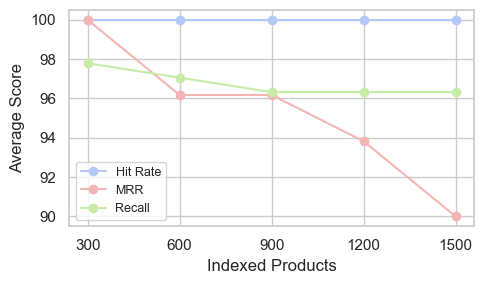

In [339]:
# Plotting
fig, ax = plt.subplots(figsize=(5, 3))

# Plot each metric as a separate line
ax.plot(data_df['Products'], data_df['avg_hit_rate'], marker='o', color=colors[0], label='avg_hit_rate')
ax.plot(data_df['Products'], data_df['avg_mrr'], marker='o', color=colors[1], label='avg_mrr')
ax.plot(data_df['Products'], data_df['avg_recall'], marker='o', color=colors[2], label='avg_recall')

# Add labels and title
ax.set_xlabel('Indexed Products')
ax.set_ylabel('Average Score')
ax.legend(loc='best')

ax.legend(loc="lower left", fontsize=9, labels=["Hit Rate", "MRR", "Recall"])

# Show the plot
plt.tight_layout()
plt.show()

### Compute average evaluation results

#### Retrieval

In [344]:
# Average Generation metrics: Retrieval 3
CC = 75.41+70.49+85.25+98.36
C = 77.05+88.52+78.69+98.36
R = 75.41+81.97+80.33+98.36

R3 = (CC+C+R)/12

In [345]:
# Average Generation metrics: Retrieval 2
CC = 73.77+67.21+85.25+98.36
C = 78.69+75.41+80.33+98.36
R = 75.41+80.33+75.41+98.36

R2 = (CC+C+R)/12

In [346]:
R3 - R2

1.7758333333333383

#### Generation

In [348]:
data = []

# Define the versions to compare
versions_to_compare = [4, 5, 6, 10, 11, 12, 13, 14, 15, 16, 17, 18]

# Iterate over the selected versions
for version in versions_to_compare:
    csv_file = f'../experiments/v{version}/summary_statistics.csv'
    try:
        df = pd.read_csv(csv_file)  # Adjust delimiter if necessary
        experiment_name = f'v{version}'  # Use version as experiment name
        data.append({
            'Experiment': experiment_name,
            'Retrieval_Setting': 'Retrieval 2',
            'Generation_Setting': 'COMPACT + Context Reorder' if version < 8 else ('REFINE + Context Reorder' if 8 < version < 13 else ( 'COMPACT' if 12 < version < 16 else 'COMPACT + 0.85')),
            'Chat_Setting': 'condense_context' if (version == 4) or (version == 10) or (version == 13) or (version == 16) else ('condense' if (version == 5) or (version == 11) or (version == 14) or (version == 17) else 'react'),
            'relevancy_passing_rate': df['relevancy_passing_rate'].iloc[0],
            'faithfulness_passing_rate': df['faithfulness_passing_rate'].iloc[0],
            'correctness_passing_rate': df['correctness_passing_rate'].iloc[0],
            'semantic_similarity_passing_rate': df['semantic_similarity_passing_rate'].iloc[0],
            'avg_query_time': df['avg_query_time'].iloc[0]
        })
    except FileNotFoundError:
        print(f"File {csv_file} not found.")
    except pd.errors.EmptyDataError:
        print(f"File {csv_file} is empty.")
    except Exception as e:
        print(f"An error occurred while processing {csv_file}: {e}")

# Convert list of dictionaries to DataFrame
data_df = pd.DataFrame(data)

In [349]:
data_df

,Experiment,Retrieval_Setting,Generation_Setting,Chat_Setting,relevancy_passing_rate,faithfulness_passing_rate,correctness_passing_rate,semantic_similarity_passing_rate,avg_query_time
0,v4,Retrieval 2,COMPACT + Context Reorder,condense_context,73.770492,67.213115,85.245902,98.360656,2.597913
1,v5,Retrieval 2,COMPACT + Context Reorder,condense,78.688525,75.409836,80.327869,98.360656,2.344331
2,v6,Retrieval 2,COMPACT + Context Reorder,react,75.409836,80.327869,75.409836,98.360656,3.765271
3,v10,Retrieval 2,REFINE + Context Reorder,condense_context,80.327869,62.295082,86.885246,98.360656,2.760705
4,v11,Retrieval 2,REFINE + Context Reorder,condense,68.852459,68.852459,65.573770,91.803279,6.629656
5,v12,Retrieval 2,REFINE + Context Reorder,react,63.934426,75.409836,63.934426,93.442623,7.976062
6,v13,Retrieval 2,COMPACT,condense_context,80.327869,68.852459,83.606557,98.360656,3.187841
7,v14,Retrieval 2,COMPACT,condense,65.573770,60.655738,80.327869,96.721311,2.228963
8,v15,Retrieval 2,COMPACT,react,67.213115,70.491803,77.049180,98.360656,3.763590
9,v16,Retrieval 2,COMPACT + 0.85,condense_context,75.409836,63.934426,80.327869,98.360656,6.682006


In [356]:
for i, generation_setting in enumerate(['COMPACT + Context Reorder', 'REFINE + Context Reorder', 'COMPACT', 'COMPACT + 0.85']):
    chat = 0
    for j, chat_setting in enumerate(['condense_context', 'condense', 'react']):

        subset = data_df[(data_df['Generation_Setting'] == generation_setting) & (data_df['Chat_Setting'] == chat_setting)]

        sum_ = subset.iloc[0, 4:8].sum()
        chat += sum_
    
    print(generation_setting)
    print(chat/12)
    sum_ = 0


COMPACT + Context Reorder
82.24043715846994
REFINE + Context Reorder
76.63934426229508
COMPACT
78.96174863387978
COMPACT + 0.85
75.27322404371584


In [357]:
A = 82.24043715846994 - 76.63934426229508
B = 82.24043715846994 - 78.96174863387978
C = 82.24043715846994 - 75.27322404371584

(A+B+C) / 3

5.28233151183971

In [360]:
for j, chat_setting in enumerate(['condense_context', 'condense', 'react']):
        subset = data_df[(data_df['Generation_Setting'] == "COMPACT + Context Reorder") & (data_df['Chat_Setting'] == chat_setting)]

        sum_ = subset.iloc[0, 4:8].sum()
        print(chat_setting)
        print(sum_/4)

condense_context
81.14754098360655
condense
83.19672131147541
react
82.37704918032787
